** Loading , inspecting dataset & Importing libraries**

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"","key":""}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d priyamchoksi/100000-diabetes-clinical-dataset
!unzip 100000-diabetes-clinical-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/priyamchoksi/100000-diabetes-clinical-dataset
License(s): MIT
100000-diabetes-clinical-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  100000-diabetes-clinical-dataset.zip
replace diabetes_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes_dataset.csv    


In [ ]:
#Importing libraries
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from matplotlib import pyplot
import numpy as np
import pandas as pd
import pandas as read_csv
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:

    df = pd.read_csv('diabetes_dataset.csv')

In [ ]:
def get_information(df):
    print("Datashape: ", df.shape)

    print("Dataset information*************************")
    df.info()

    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")
    print("Unique numbers********************")

    for col in df.columns:
        print(f"{col}: {df[col].isnull().sum()}")
    print("Totall number of null number********************")

    print("Dublicated rows count: ", df.duplicated().sum())

    print("Stastical describtion of Dataset*****************************",)
    return df.describe().transpose()

# Calling function
get_information(df)

Datashape:  (100000, 16)
Dataset information*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-nu

,count,mean,std,min,25%,50%,75%,max
year,100000.0,2018.360820,1.345239,2015.00,2019.00,2019.00,2019.00,2022.00
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
race:AfricanAmerican,100000.0,0.202230,0.401665,0.00,0.00,0.00,0.00,1.00
race:Asian,100000.0,0.200150,0.400114,0.00,0.00,0.00,0.00,1.00
race:Caucasian,100000.0,0.198760,0.399069,0.00,0.00,0.00,0.00,1.00
race:Hispanic,100000.0,0.198880,0.399160,0.00,0.00,0.00,0.00,1.00
race:Other,100000.0,0.199980,0.399987,0.00,0.00,0.00,0.00,1.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69


In [ ]:
# Deleting duplicated rows
df = df.drop_duplicates()
print("Dublicated rows count: ", df.duplicated().sum())

Dublicated rows count:  0


**Data preparation and EDA***

***bold text***

In [ ]:
df_race = df[["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"]]
by_race = pd.from_dummies(df_race)
dff = df.drop(columns = ["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"])
dff.insert(2, "race", by_race)
dff["race"] = dff["race"].str.replace("race:", "")
dff["race"] = dff["race"].str.replace("AfricanAmerican", "African-American")

bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
age_order = ["0-18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
dff.insert(3, "age_cat", pd.cut(dff["age"], bins, labels = age_order))

bins = [0, 18.5, 25, 30, 35, 40, np.inf]
bmi_order = ["Underweight", "Normal", "Overweight", "Moderately Obese", "Severely Obese", "Morbidly Obese"]
dff.insert(9, "bmi_cat", pd.cut(dff["bmi"], bins, labels = bmi_order))

dff["smoking_history"] = dff["smoking_history"].str.title()
dff = dff[dff["smoking_history"] != "No Info"]

columns = ['gender', 'race', 'age_cat', 'location', 'hypertension', 'heart_disease', 'smoking_history', 'bmi_cat',
           'diabetes']

for col in columns:

    if col in ['gender', 'race', 'age_cat', 'location', 'smoking_history', 'bmi_cat']:
        dff[col] = dff[col].astype("category")

    else:
        dff[col] = dff[col].astype("bool")

print(dff.head())

columns = list(dff.columns)
new_name = [col.title() for col in columns]

for c, n in zip(columns, new_name):
    dff = dff.rename(columns = {c:n})

dff = dff.rename(columns = {"Age_Cat":"Age Group",
                            "Heart_Disease":"Heart Disease",
                            "Smoking_History":"Smoking History",
                            "Bmi_Cat":"BMI Category",
                            "Bmi":"BMI",
                            "Hba1C_Level":"HbA1C Level",
                            "Blood_Glucose_Level":"Blood Glucose Level"
                           }
                )
print(dff.head())


diabetes_yes = dff[dff["Diabetes"] == True]
diabetes_no = dff[dff["Diabetes"] == False].sample(n = diabetes_yes.shape[0], ignore_index = True, random_state = 42)

sample = pd.concat([diabetes_yes, diabetes_no], axis = 0).reset_index(drop = True)

sample.head()




   year  gender              race age_cat   age location  hypertension  \
0  2020  Female             Other   25-34  32.0  Alabama         False   
1  2015  Female             Asian   25-34  29.0  Alabama         False   
2  2015    Male             Other    0-18  18.0  Alabama         False   
3  2015    Male         Caucasian   35-44  41.0  Alabama         False   
4  2016  Female  African-American   45-54  52.0  Alabama         False   

   heart_disease smoking_history     bmi_cat    bmi  hbA1c_level  \
0          False           Never  Overweight  27.32          5.0   
1          False           Never      Normal  19.95          5.0   
2          False           Never      Normal  23.76          4.8   
3          False           Never  Overweight  27.32          4.0   
4          False           Never      Normal  23.75          6.5   

   blood_glucose_level  diabetes  
0                  100     False  
1                   90     False  
2                  160     False  
3     

,Year,Gender,Race,Age Group,Age,Location,Hypertension,Heart Disease,Smoking History,BMI Category,BMI,HbA1C Level,Blood Glucose Level,Diabetes
0,2016,Female,Other,55-64,64.0,Alabama,False,False,Ever,Morbidly Obese,49.27,8.2,140,True
1,2016,Male,African-American,65+,80.0,Alabama,False,False,Former,Overweight,29.16,8.8,140,True
2,2016,Female,Other,35-44,42.0,Alabama,False,False,Current,Overweight,27.32,7.5,130,True
3,2016,Female,Hispanic,65+,80.0,Alabama,False,True,Never,Overweight,26.00,7.5,200,True
4,2015,Female,Caucasian,65+,79.0,Alabama,False,False,Never,Moderately Obese,30.84,5.8,220,True


In [ ]:
df_encoded = sample.drop(columns = ["Age Group", "BMI Category"])
le = LabelEncoder()

df_encoded["Gender"] = le.fit_transform(df_encoded["Gender"])
df_encoded["Location"] = le.fit_transform(df_encoded["Location"])
df_encoded["Race"] = le.fit_transform(df_encoded["Race"])
df_encoded["Smoking History"] = le.fit_transform(df_encoded["Smoking History"])
df_encoded


y = df_encoded["Diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size = 0.2, random_state = 42)
#scaler_X = StandardScaler()

#X_train_scaled = scaler_X.fit_transform(X_train)
#X_test_scaled = scaler_X.fit_transform(X_test)

***MODEL DEFINE AND EVALUATION***

In [ ]:
!pip install pycaret
from pycaret.classification import *

In [ ]:

# Initialize PyCaret setup
clf = setup(data=X_train, target=y_train, session_id=42,remove_outliers = True,normalize = True,fix_imbalance = True, verbose=False )
# Compare models and select the best one
best_model = compare_models()
# Get the best model
print(best_model)
# Finalize the model
final_model = finalize_model(best_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2180
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3590
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6210
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3780
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9980
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4530
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9130
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8810
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4130
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Finalize the model
final_model = finalize_model(best_model)
# Predict on the test data
y_pred = predict_model(final_model, data=X_test)
print(y_pred)

       Year  Gender  Race   Age  Location  Hypertension  Heart Disease  \
9809   2019       0     3  72.0        31          True          False   
353    2019       0     0  57.0         2         False          False   
8400   2019       0     3  58.0        12         False          False   
6424   2015       1     4  62.0        47         False          False   
3785   2019       0     2  60.0        26         False          False   
...     ...     ...   ...   ...       ...           ...            ...   
8878   2018       0     2  28.0        32         False          False   
12424  2018       0     2  37.0         3         False          False   
9674   2019       0     0  45.0        46          True          False   
6790   2019       0     3  47.0        50         False          False   
9373   2019       1     1  21.0        34         False          False   

       Smoking History        BMI  HbA1C Level  Blood Glucose Level  Diabetes  \
9809                 3  27.209

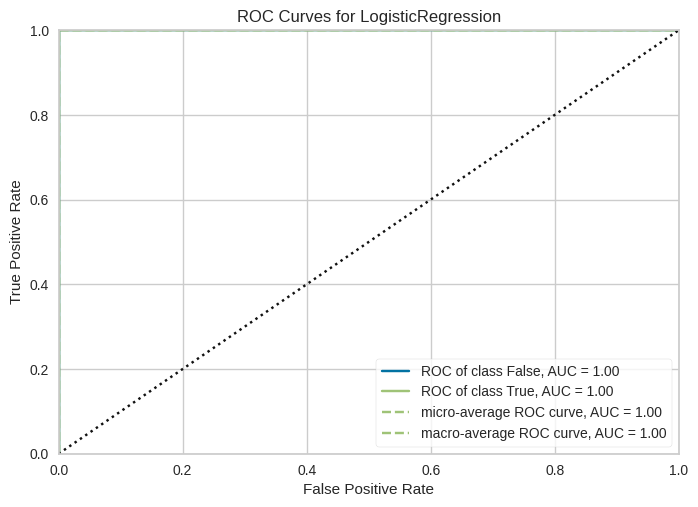

In [ ]:
#tuned = tune_model(final_model)
plot_model(final_model, plot = 'auc')

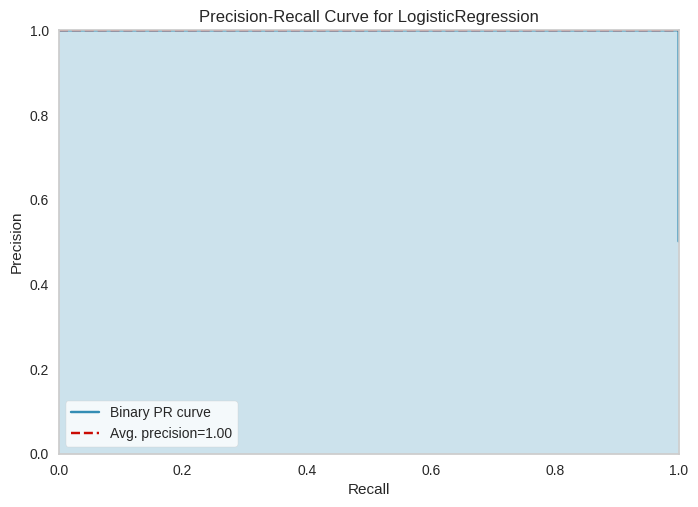

In [ ]:
plot_model(final_model, plot = 'pr')

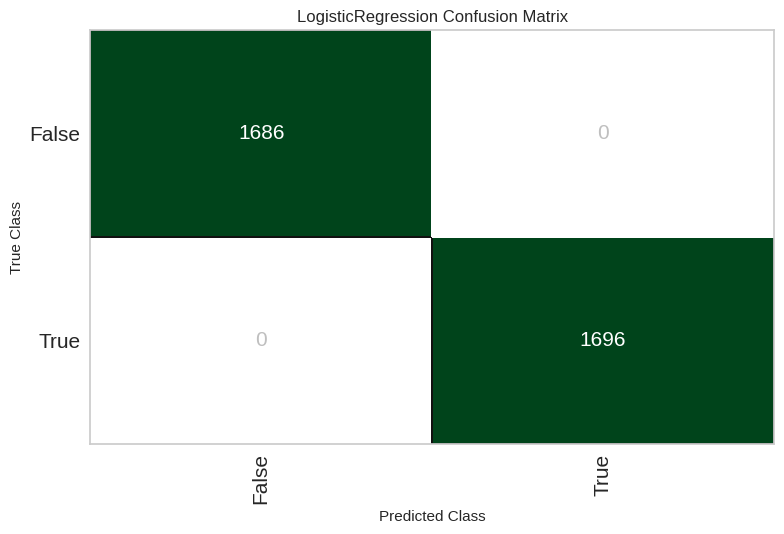

In [ ]:
plot_model(final_model, plot = 'confusion_matrix')